# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from api_keys import weather_api_key
print(weather_api_key)

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

4b8ba6370300bb535664c1d24b3b5302


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
#City          550 q
#Lat           550 
#Lng           550
#Max Temp      550
#Humidity      550
#Cloudiness    550
#Wind Speed    550
#Country       550
#Date          550

#params = #above
# Build query URL and request your results in Celsius
#city = "Bujumbura"
#Test url = "http://api.openweathermap.org/data/2.5/weather?"+"q="+city+"&appid="+weather_api_key+"&units="+units
# Get weather data api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}
#url

city = cities[0]
params = {
    'units' : "metric",
    'q' : city,
    'appid' : weather_api_key
}
base_url = "http://api.openweathermap.org/data/2.5/weather"
response = requests.get(base_url,params=params)
print(response.url)


http://api.openweathermap.org/data/2.5/weather?units=metric&q=mahebourg&appid=4b8ba6370300bb535664c1d24b3b5302


In [19]:
queryData = response.json()
queryData

{'coord': {'lon': 57.7, 'lat': -20.41},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 25.22,
  'feels_like': 24.94,
  'temp_min': 25,
  'temp_max': 25.56,
  'pressure': 1018,
  'humidity': 69},
 'visibility': 10000,
 'wind': {'speed': 5.1, 'deg': 100},
 'clouds': {'all': 40},
 'dt': 1586812412,
 'sys': {'type': 1,
  'id': 2061,
  'country': 'MU',
  'sunrise': 1586830795,
  'sunset': 1586872710},
 'timezone': 14400,
 'id': 934322,
 'name': 'Mahébourg',
 'cod': 200}

In [47]:
#Create DF first didn't work...going back doing lists first and then add data to it from API calls city by city
#But then ran into list len mismatch trying to merge in DF...so...going back to DF first, and using iterrows


Lat = [] 
Lng  = []
Max_Temp  = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country  = []
Date   = []

city_weather_df = pd.DataFrame({
        'Lat' : Lat, 
        'Lng'  : Lng,
        'Max_Temp'  : Max_Temp,
        'Humidity' : Humidity,
        'Cloudiness' : Cloudiness,
        'Wind_Speed' : Wind_Speed,
        'Country'  : Country,
        'Date'   : Date
    })

city_weather_df['City'] = cities

city_weather_df

#Test for subset 
#for city in cities[0:50]:
#    try:
#        url = "http://api.openweathermap.org/data/2.5/weather?"+"q="+city+"&appid="+weather_api_key+"&units="+units
#        response = requests.get(url)
#        queryData = response.json()
#        Lat.append(queryData['coord']['lat'])
#        Lng.append(queryData['coord']['lon'])
#        Max_Temp.append(queryData['main']['temp_max'])
#    except KeyError:
#        print("Not found")
    
#print(Lat)
#print(Lng)
#print(Max_Temp)




,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,City
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mahebourg
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,langsa
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nome
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tasiilaq
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,victoria
...,...,...,...,...,...,...,...,...,...
604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,champerico
605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,manaus
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ongandjera
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sovetskiy


In [48]:
#Lists resulted in different sizes from missing data, and didn't know how to merge later
#for city in cities:
#    try:
#        url = "http://api.openweathermap.org/data/2.5/weather?"+"q="+city+"&appid="+weather_api_key+"&units="+units
#        response = requests.get(url)
#        queryData = response.json()
#        Lat.append(queryData['coord']['lat'])
#        Lng.append(queryData['coord']['lon'])
#        Max_Temp.append(queryData['main']['temp_max'])
#        Humidity.append(queryData['main']['humidity'])
#        Cloudiness.append(queryData['clouds']['all'])
#        Wind_Speed.append(queryData['wind']['speed'])
#        Date.append(queryData['dt'])
#    except KeyError:
#        print("Not found")
#print(Lat)
#print(Lng)
#print(Max_Temp)
#print(Humidity)
#print(Cloudiness)
#print(Wind_Speed)
#print(Date)
#print(len(Lat))
#print(len(Lng))
#print(len(Max_Temp))
#print(len(Humidity))
#print(len(Cloudiness))
#print(len(Wind_Speed))
#print(len(Date))
#80
#80
#80
#40
#40
#40
#40



#Populate DF for real 

# use iterrows to iterate through pandas dataframe
for index, row in city_weather_df.iterrows():

    # get city from df
    searchCity = row['City']

    # add keyword to params dict
    params['q'] = searchCity

    # assemble url and make API request
    #print(f"Retrieving Results for Index {index}: {searchCity}.")
    queryData = requests.get(base_url, params=params).json()
    
    # extract results
    #results = response['results']
    
    try:
        city_weather_df.loc[index,'Lat'] = queryData['coord']['lat']
        city_weather_df.loc[index,'Lng'] = queryData['coord']['lon']
        city_weather_df.loc[index,'Max_Temp'] = queryData['main']['temp_max']
        city_weather_df.loc[index,'Humidity'] = queryData['main']['humidity']
        city_weather_df.loc[index,'Cloudiness'] = queryData['clouds']['all']
        city_weather_df.loc[index,'Wind_Speed'] = queryData['wind']['speed']
        city_weather_df.loc[index,'Date'] = queryData['dt']
        city_weather_df.loc[index,'Country'] = queryData['sys']['country']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    
    
    
city_weather_df.head(20)

Retrieving Results for Index 0: mahebourg.
Retrieving Results for Index 1: langsa.
Retrieving Results for Index 2: nome.
Retrieving Results for Index 3: tasiilaq.
Retrieving Results for Index 4: victoria.
Retrieving Results for Index 5: viedma.
Retrieving Results for Index 6: saldanha.
Retrieving Results for Index 7: ushuaia.
Retrieving Results for Index 8: tiksi.
Retrieving Results for Index 9: mataura.
Retrieving Results for Index 10: longyearbyen.
Retrieving Results for Index 11: manhattan.
Retrieving Results for Index 12: izumo.
Retrieving Results for Index 13: samusu.
Missing field/result... skipping.
Retrieving Results for Index 14: doctor pedro p. pena.
Missing field/result... skipping.
Retrieving Results for Index 15: jamestown.
Retrieving Results for Index 16: chuy.
Retrieving Results for Index 17: palabuhanratu.
Missing field/result... skipping.
Retrieving Results for Index 18: busselton.
Retrieving Results for Index 19: barrow.
Retrieving Results for Index 20: severo-kurilsk

Retrieving Results for Index 170: touros.
Retrieving Results for Index 171: aksu.
Retrieving Results for Index 172: georgetown.
Retrieving Results for Index 173: tsentralnyy.
Missing field/result... skipping.
Retrieving Results for Index 174: kununurra.
Retrieving Results for Index 175: baruun-urt.
Retrieving Results for Index 176: saravan.
Retrieving Results for Index 177: trincomalee.
Retrieving Results for Index 178: hovd.
Retrieving Results for Index 179: nelson bay.
Retrieving Results for Index 180: naryan-mar.
Retrieving Results for Index 181: akureyri.
Retrieving Results for Index 182: saint-philippe.
Retrieving Results for Index 183: kovdor.
Retrieving Results for Index 184: arraial do cabo.
Retrieving Results for Index 185: yulara.
Retrieving Results for Index 186: chermoz.
Retrieving Results for Index 187: otjimbingwe.
Retrieving Results for Index 188: bulawayo.
Retrieving Results for Index 189: bargal.
Missing field/result... skipping.
Retrieving Results for Index 190: turan

Retrieving Results for Index 347: heishan.
Retrieving Results for Index 348: palmer.
Retrieving Results for Index 349: camacha.
Retrieving Results for Index 350: acaponeta.
Retrieving Results for Index 351: kinchil.
Retrieving Results for Index 352: izberbash.
Retrieving Results for Index 353: camopi.
Retrieving Results for Index 354: tonj.
Retrieving Results for Index 355: umzimvubu.
Missing field/result... skipping.
Retrieving Results for Index 356: omsukchan.
Retrieving Results for Index 357: leningradskiy.
Retrieving Results for Index 358: tabou.
Retrieving Results for Index 359: shangqiu.
Retrieving Results for Index 360: srednekolymsk.
Retrieving Results for Index 361: badhni kalan.
Retrieving Results for Index 362: le port.
Retrieving Results for Index 363: coihaique.
Retrieving Results for Index 364: sartana.
Retrieving Results for Index 365: caravelas.
Retrieving Results for Index 366: grenville.
Retrieving Results for Index 367: pipri.
Retrieving Results for Index 368: ulaanb

Retrieving Results for Index 523: mawlaik.
Retrieving Results for Index 524: adrar.
Retrieving Results for Index 525: karpathos.
Retrieving Results for Index 526: montevideo.
Retrieving Results for Index 527: asosa.
Retrieving Results for Index 528: lompoc.
Retrieving Results for Index 529: peringat.
Retrieving Results for Index 530: el balyana.
Missing field/result... skipping.
Retrieving Results for Index 531: russell.
Retrieving Results for Index 532: fulacunda.
Missing field/result... skipping.
Retrieving Results for Index 533: kerman.
Retrieving Results for Index 534: tigil.
Retrieving Results for Index 535: fairbanks.
Retrieving Results for Index 536: tsabong.
Retrieving Results for Index 537: anzio.
Retrieving Results for Index 538: horadiz.
Retrieving Results for Index 539: dingle.
Retrieving Results for Index 540: zhangye.
Retrieving Results for Index 541: putai.
Retrieving Results for Index 542: shahrud.
Retrieving Results for Index 543: zvishavane.
Retrieving Results for Ind

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,City
0,-20.41,57.70,25.00,73.0,20.0,4.10,MU,1.586817e+09,mahebourg
1,4.47,97.97,25.13,87.0,94.0,0.54,ID,1.586817e+09,langsa
2,64.50,-165.41,-1.67,92.0,90.0,1.50,US,1.586817e+09,nome
3,65.61,-37.64,1.00,64.0,5.0,9.30,GL,1.586817e+09,tasiilaq
4,22.29,114.16,20.56,52.0,100.0,1.50,HK,1.586817e+09,victoria
5,-40.81,-63.00,12.67,64.0,0.0,2.67,AR,1.586817e+09,viedma
6,-33.01,17.94,14.00,87.0,0.0,2.60,ZA,1.586817e+09,saldanha
7,-54.80,-68.30,9.00,66.0,40.0,9.80,AR,1.586816e+09,ushuaia
8,71.69,128.87,-18.86,88.0,0.0,2.09,RU,1.586817e+09,tiksi
9,-46.19,168.86,8.33,69.0,49.0,5.36,NZ,1.586817e+09,mataura


In [49]:
city_weather_df.head(100)

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,City
0,-20.41,57.70,25.00,73.0,20.0,4.10,MU,1.586817e+09,mahebourg
1,4.47,97.97,25.13,87.0,94.0,0.54,ID,1.586817e+09,langsa
2,64.50,-165.41,-1.67,92.0,90.0,1.50,US,1.586817e+09,nome
3,65.61,-37.64,1.00,64.0,5.0,9.30,GL,1.586817e+09,tasiilaq
4,22.29,114.16,20.56,52.0,100.0,1.50,HK,1.586817e+09,victoria
...,...,...,...,...,...,...,...,...,...
95,51.86,33.47,11.37,66.0,91.0,6.92,UA,1.586817e+09,shostka
96,41.37,-73.41,17.22,93.0,90.0,6.70,US,1.586817e+09,bethel
97,50.48,35.68,10.00,39.0,100.0,7.00,RU,1.586817e+09,grayvoron
98,28.75,-82.50,31.67,74.0,75.0,2.60,US,1.586817e+09,florida


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [50]:
#Cleanup the df created

city_weather_df.count()



Lat           558
Lng           558
Max_Temp      558
Humidity      558
Cloudiness    558
Wind_Speed    558
Country       558
Date          558
City          609
dtype: int64

In [51]:
city_weather_df.dropna(inplace=True)
city_weather_df.count()

Lat           558
Lng           558
Max_Temp      558
Humidity      558
Cloudiness    558
Wind_Speed    558
Country       558
Date          558
City          558
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [52]:
city_weather_df.describe()
#Max Humidity shows that none are above 100...skipping steps below

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,19.071057,16.761792,15.348853,68.048387,54.858423,3.758925,1.586817e+09
std,33.401365,90.336048,11.506939,21.791969,36.257156,2.614931,1.086154e+02
min,-54.800000,-179.170000,-18.860000,3.000000,0.000000,0.220000,1.586816e+09
25%,-8.310000,-62.850000,6.000000,54.250000,20.000000,1.922500,1.586817e+09
50%,22.395000,24.700000,17.000000,73.000000,61.000000,3.225000,1.586817e+09
75%,46.580000,97.777500,25.627500,86.000000,90.000000,5.037500,1.586817e+09
max,78.220000,179.320000,36.000000,100.000000,100.000000,22.100000,1.586817e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

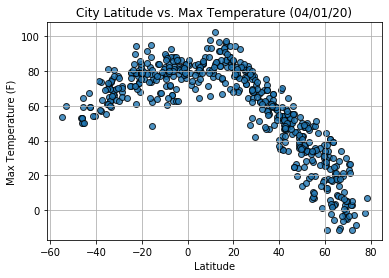

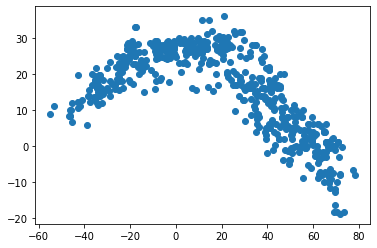

In [53]:
latitude = city_weather_df['Lat']
temp = city_weather_df['Max_Temp']

plt.scatter(latitude,temp)

## Latitude vs. Humidity Plot

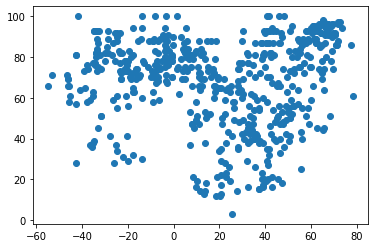

In [54]:
humidity = city_weather_df['Humidity']

plt.scatter(latitude,humidity)

## Latitude vs. Cloudiness Plot

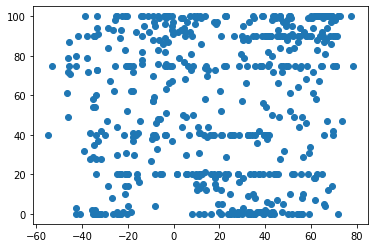

In [55]:
cloudiness = city_weather_df['Cloudiness']

plt.scatter(latitude,cloudiness)

## Latitude vs. Wind Speed Plot

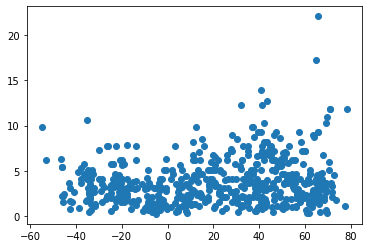

In [56]:
windSpeed = city_weather_df['Wind_Speed']
plt.scatter(latitude,windSpeed)

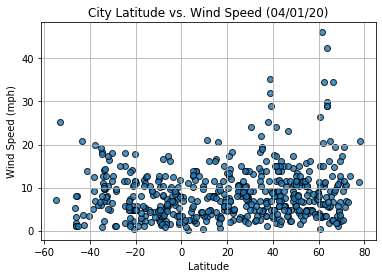

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


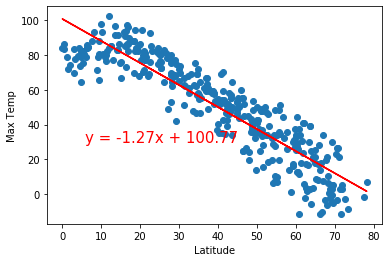

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


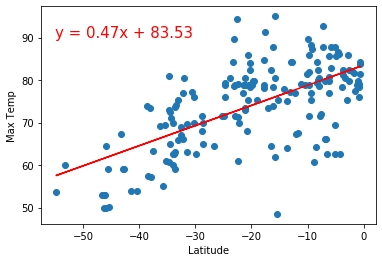

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


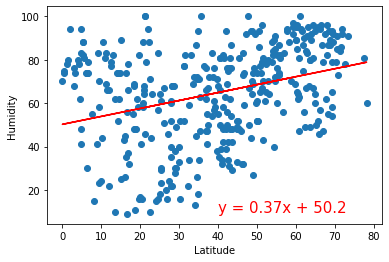

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


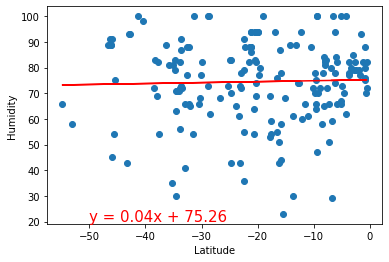

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


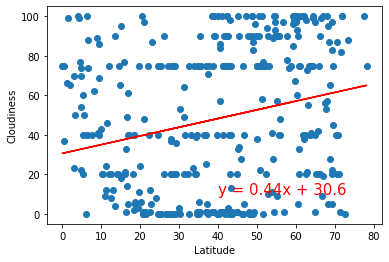

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


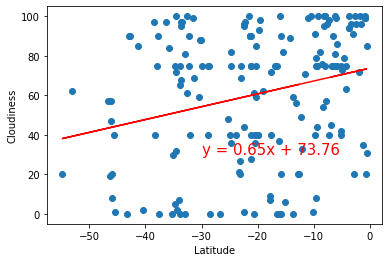

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


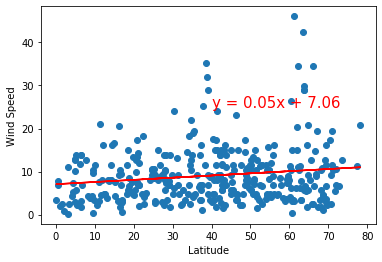

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


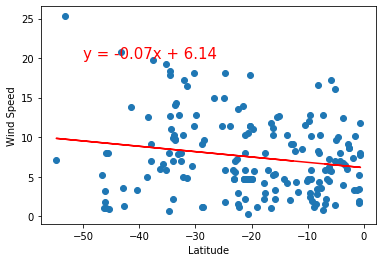